# Udacity Machine Learning Capstone Project
## Image Classification on the Yelp! Dataset using CNN and Transfer learning
** Part 2: Identifying the type of food present in the image **

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import os
from time import time
import cv2
import glob
from collections import Counter
import itertools

In [2]:
# Get all the paths of foods from the 'food_photos' folder
food_paths = glob.glob('./food_photos/*/*')

In [3]:
# Get the respective labels of the food from it's paths
food_labels = list()
for path in food_paths:
     food_labels.append(path.split('/')[2])

In [4]:
# Get the index of all the foods
food_index = {food:k for k, food in enumerate(set(food_labels))}
food_index

{'burger': 4,
 'fries': 2,
 'ice_cream': 6,
 'noodles': 0,
 'pizza': 7,
 'salad': 1,
 'steak': 5,
 'tacos': 3}

In [5]:
# Define function to one hot encode the labels as well as get food from labels
''' 0. noodles
    1. salad
    2. fries
    3. tacos
    4. burger
    5. steak
    6. ice_cream
    7. pizza
'''

def get_food_label(label, food_index):
    if (label == 'noodles'):
        in_array = np.zeros(len(food_index))
        in_array[food_index['noodles']] = 1
        return in_array
    elif (label == 'salad'):
        in_array = np.zeros(len(food_index))
        in_array[food_index['salad']] = 1
        return in_array
    elif (label == 'fries'):
        in_array = np.zeros(len(food_index))
        in_array[food_index['fries']] = 1
        return in_array
    elif (label == 'tacos'):
        in_array = np.zeros(len(food_index))
        in_array[food_index['tacos']] = 1
        return in_array
    elif (label == 'burger'):
        in_array = np.zeros(len(food_index))
        in_array[food_index['burger']] = 1
        return in_array
    elif (label == 'steak'):
        in_array = np.zeros(len(food_index))
        in_array[food_index['steak']] = 1
        return in_array
    elif (label == 'ice_cream'):
        in_array = np.zeros(len(food_index))
        in_array[food_index['ice_cream']] = 1
        return in_array
    elif (label == 'pizza'):
        in_array = np.zeros(len(food_index))
        in_array[food_index['pizza']] = 1
        return in_array
    
def get_food(label):
    
    if (label == 0):
        return 'noodles'
    elif (label == 1):
        return 'salad'
    elif (label == 2):
        return 'fries'
    elif (label == 3):
        return 'tacos'
    elif (label == 4):
        return 'burger'
    elif (label == 5):
        return 'steak'
    elif (label == 6):
        return 'ice_cream'
    elif (label == 7):
        return 'pizza'

In [6]:
# One hot encode the labels
one_hot_lables = list()
for label in food_labels:
    one_hot_lables.append(list(get_food_label(label, food_index)))

### Splitting data into Training, Testing and Cross Validation datasets

The dataset is split into training data which comprises of 80% of data, cross validation data into 10% and testing data into 10%

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_buff, y_train, y_buff = train_test_split(food_paths, one_hot_lables, stratify=food_labels, train_size=0.8)
x_val, x_test, y_val, y_test = train_test_split(x_buff, y_buff, stratify=y_buff, train_size=0.5)

print "Number of training data: ", len(x_train)
print "Number of cross validation data: ", len(x_val)
print "Number of testing data: ", len(x_test)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Number of training data:  5047
Number of cross validation data:  631
Number of testing data:  631


In [8]:
from keras.preprocessing import image

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in img_paths]
    return np.vstack(list_of_tensors)

Using TensorFlow backend.


In [9]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(x_train).astype('float32')/255
valid_tensors = paths_to_tensor(x_val).astype('float32')/255
test_tensors = paths_to_tensor(x_test).astype('float32')/255

## Training Phase

### 1. Simple CNN with 5 hidden layers

In [11]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten, Dense, Dropout
from keras.models import Sequential, optimizers

model_cnn5 = Sequential()

model_cnn5.add(Conv2D(filters=16, kernel_size=4, padding='same', activation='relu', input_shape=(224,224,3)))
model_cnn5.add(Dropout(0.3))
model_cnn5.add(MaxPooling2D(pool_size=2))

model_cnn5.add(Conv2D(filters=32, kernel_size=4, padding='same', activation='relu'))
model_cnn5.add(Dropout(0.3))
model_cnn5.add(MaxPooling2D(pool_size=2))

model_cnn5.add(Conv2D(filters=64, kernel_size=4, padding='same', activation='relu'))
model_cnn5.add(Dropout(0.3))
model_cnn5.add(MaxPooling2D(pool_size=2))

model_cnn5.add(Conv2D(filters=128, kernel_size=4, padding='same', activation='relu'))
model_cnn5.add(Dropout(0.3))
model_cnn5.add(MaxPooling2D(pool_size=2))

model_cnn5.add(Conv2D(filters=256, kernel_size=4, padding='same', activation='relu'))
model_cnn5.add(Dropout(0.3))
model_cnn5.add(MaxPooling2D(pool_size=2))

model_cnn5.add(GlobalAveragePooling2D())

model_cnn5.add(Dense(128, activation='relu'))
model_cnn5.add(Dropout(0.3))
model_cnn5.add(Dense(64, activation='relu'))
model_cnn5.add(Dropout(0.3))
model_cnn5.add(Dense(8, activation='softmax'))

model_cnn5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 16)      784       
_________________________________________________________________
dropout_1 (Dropout)          (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 32)      8224      
_________________________________________________________________
dropout_2 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 64)        32832     
__________

In [12]:
from keras.callbacks import ModelCheckpoint

model_cnn5.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 20

checkpointer = ModelCheckpoint(filepath='final_weights/weights.best.food_cnn_5.hdf5', 
                               verbose=1, save_best_only=True)

history_food_cnn5 = model_cnn5.fit(train_tensors, y_train, 
          validation_data=(valid_tensors, y_val),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 5047 samples, validate on 631 samples
Epoch 1/20
5047/5047 [==============================] - 33s - loss: 2.0332 - acc: 0.1694 - val_loss: 2.1214 - val_acc: 0.1236
Epoch 2/20
5047/5047 [==============================] - 29s - loss: 1.8574 - acc: 0.2851 - val_loss: 1.7502 - val_acc: 0.3835
Epoch 3/20
5047/5047 [==============================] - 29s - loss: 1.6546 - acc: 0.4145 - val_loss: 1.8123 - val_acc: 0.2599
Epoch 4/20
5047/5047 [==============================] - 30s - loss: 1.4909 - acc: 0.4817 - val_loss: 1.5498 - val_acc: 0.4739
Epoch 5/20
5047/5047 [==============================] - 30s - loss: 1.3526 - acc: 0.5320 - val_loss: 1.3370 - val_acc: 0.5769
Epoch 6/20
5047/5047 [==============================] - 30s - loss: 1.2618 - acc: 0.5732 - val_loss: 1.6730 - val_acc: 0.3391
Epoch 7/20
5047/5047 [==============================] - 30s - loss: 1.2086 - acc: 0.5889 - val_loss: 1.3364 - val_acc: 0.6371
Epoch 8/20
5047/5047 [==============================] - 30s - loss: 1.1

#### Training plots for CNN with 5 hidden layers

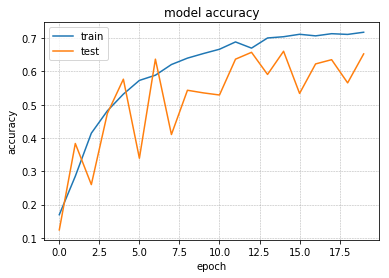

In [13]:
plt.plot(history_food_cnn5.history['acc'])
plt.plot(history_food_cnn5.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

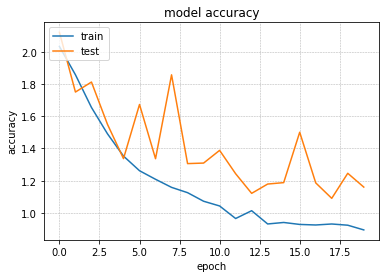

In [14]:
plt.plot(history_food_cnn5.history['loss'])
plt.plot(history_food_cnn5.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(linestyle='--', linewidth=0.5)
plt.show()

#### Test Accuracy on CNN with 5 hidden layers

In [16]:
score_cnn5 = 0
for k,path in enumerate(x_test):
    pred_ = np.argmax(model_cnn5.predict(paths_to_tensor([path]).astype('float32')/255))
    if (pred_==np.argmax(y_test[k])):
        score_cnn5=score_cnn5+1
        
print "Testing Accuracy on 5 layer CNN: ", float(score_cnn5)/len(x_test)

Testing Accuracy on 5 layer CNN:  0.665610142631


### 2. Transfer Learning: VGG19

In [24]:
from keras.applications import VGG19
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))

#for layer in vgg19_model.layers[:5]:
#    layer.trainable = False
    
x = vgg19_model.output
x = Flatten()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation="softmax")(x)
model_vgg19 = Model(inputs=vgg19_model.input, outputs=predictions)
model_vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [25]:
from keras.callbacks import ModelCheckpoint

model_vgg19.compile(optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), 
                    loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10

checkpointer = ModelCheckpoint(filepath='final_weights/weights.best.food_vgg19.hdf5',
                              verbose=1, save_best_only=True)

history_food_vgg19 = model_vgg19.fit(train_tensors, y_train,
                              validation_data=(valid_tensors, y_val),
                              epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 5047 samples, validate on 631 samples
Epoch 1/10
5047/5047 [==============================] - 472s - loss: 1.5850 - acc: 0.4264 - val_loss: 0.8483 - val_acc: 0.7353
Epoch 2/10
5047/5047 [==============================] - 472s - loss: 0.7584 - acc: 0.7416 - val_loss: 0.6152 - val_acc: 0.7971
Epoch 3/10
5047/5047 [==============================] - 472s - loss: 0.5261 - acc: 0.8286 - val_loss: 0.5203 - val_acc: 0.8352
Epoch 4/10
5047/5047 [==============================] - 472s - loss: 0.4008 - acc: 0.8696 - val_loss: 0.5129 - val_acc: 0.8336
Epoch 5/10
5047/5047 [==============================] - 472s - loss: 0.3291 - acc: 0.8918 - val_loss: 0.4684 - val_acc: 0.8447
Epoch 6/10
5047/5047 [==============================] - 472s - loss: 0.2517 - acc: 0.9196 - val_loss: 0.4335 - val_acc: 0.8716
Epoch 7/10
5047/5047 [==============================] - 472s - loss: 0.1987 - acc: 0.9360 - val_loss: 0.4292 - val_acc: 0.8590
Epoch 8/10
5047/5047 [==============================] - 470s - l

#### Testing accuracy for VGG19 

In [26]:
score_vgg19 = 0
for k,path in enumerate(x_test):
    pred_ = np.argmax(model_vgg19.predict(paths_to_tensor([path]).astype('float32')/255))
    if (pred_==np.argmax(y_test[k])):
        score_vgg19=score_vgg19+1
        
print "Testing Accuracy on 5 layer CNN: ", float(score_vgg19)/len(x_test)

Testing Accuracy on 5 layer CNN:  0.89381933439


### 2. Transfer Learning: ResNet50

In [16]:
from keras.applications import ResNet50
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

#for layer in vgg19_food.layers[:3]:
#    layer.trainable = False
    
x = resnet_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation="softmax")(x)
model_resnet50 = Model(inputs=resnet_model.input, outputs=predictions)

model_resnet50.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_3[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_99 (Activation)       (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

In [17]:
from keras.callbacks import ModelCheckpoint

model_resnet50.compile(optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), 
                           loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 25

checkpointer = ModelCheckpoint(filepath='final_weights/weights.best.food_resnet50.hdf5',
                              verbose=1, save_best_only=True)

history_resnet50 = model_resnet50.fit(train_tensors, y_train,
                              validation_data=(valid_tensors, y_val),
                              epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 5047 samples, validate on 631 samples
Epoch 1/25
5047/5047 [==============================] - 200s - loss: 2.2277 - acc: 0.1914 - val_loss: 2.2079 - val_acc: 0.1379
Epoch 2/25
5047/5047 [==============================] - 188s - loss: 1.7376 - acc: 0.3570 - val_loss: 2.1363 - val_acc: 0.2108
Epoch 3/25
5047/5047 [==============================] - 188s - loss: 1.3393 - acc: 0.5324 - val_loss: 1.2836 - val_acc: 0.5531
Epoch 4/25
5047/5047 [==============================] - 188s - loss: 1.0686 - acc: 0.6305 - val_loss: 0.7552 - val_acc: 0.7718
Epoch 5/25
5047/5047 [==============================] - 188s - loss: 0.8775 - acc: 0.7064 - val_loss: 0.5664 - val_acc: 0.8415
Epoch 6/25
5047/5047 [==============================] - 188s - loss: 0.7556 - acc: 0.7547 - val_loss: 0.4888 - val_acc: 0.8590
Epoch 7/25
5047/5047 [==============================] - 188s - loss: 0.6658 - acc: 0.7830 - val_loss: 0.4388 - val_acc: 0.8700
Epoch 8/25
5047/5047 [==============================] - 188s - l

#### Testing accuracy for ResNet50

In [18]:
score_resnet50 = 0
for k,path in enumerate(x_test):
    pred_ = np.argmax(model_resnet50.predict(paths_to_tensor([path]).astype('float32')/255))
    if (pred_==np.argmax(y_test[k])):
        score_resnet50=score_resnet50+1
        
print "Testing Accuracy on ResNet50 architecture: ", float(score_resnet50)/len(x_test)

Testing Accuracy on ResNet50 architecture:  0.912836767036


### 3. Transfer Learning: Xception

In [32]:
from keras.applications import Xception
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

xception_food = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))

#for layer in vgg19_food.layers[:3]:
#    layer.trainable = False
    
x = xception_food.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation="softmax")(x)
model_xception = Model(inputs=xception_food.input, outputs=predictions)

model_xception.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_9 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
block1_conv1 (Conv2D)            (None, 111, 111, 32)  864         input_9[0][0]                    
____________________________________________________________________________________________________
block1_conv1_bn (BatchNormalizat (None, 111, 111, 32)  128         block1_conv1[0][0]               
____________________________________________________________________________________________________
block1_conv1_act (Activation)    (None, 111, 111, 32)  0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [34]:
from keras.callbacks import ModelCheckpoint

model_xception.compile(optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), 
                           loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 10

checkpointer = ModelCheckpoint(filepath='final_weights/weights.best.food_xception.hdf5',
                              verbose=1, save_best_only=True)

history_xception = model_xception.fit(train_tensors, y_train,
                              validation_data=(valid_tensors, y_val),
                              epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 5047 samples, validate on 631 samples
Epoch 1/10
5047/5047 [==============================] - 241s - loss: 1.2198 - acc: 0.5954 - val_loss: 0.6916 - val_acc: 0.7702
Epoch 2/10
5047/5047 [==============================] - 233s - loss: 0.6390 - acc: 0.7983 - val_loss: 0.5801 - val_acc: 0.8035
Epoch 3/10
5047/5047 [==============================] - 233s - loss: 0.4752 - acc: 0.8548 - val_loss: 0.5338 - val_acc: 0.8130
Epoch 4/10
5047/5047 [==============================] - 233s - loss: 0.3855 - acc: 0.8831 - val_loss: 0.4826 - val_acc: 0.8352
Epoch 5/10
5047/5047 [==============================] - 233s - loss: 0.3109 - acc: 0.9027 - val_loss: 0.4616 - val_acc: 0.8399
Epoch 6/10
5047/5047 [==============================] - 233s - loss: 0.2660 - acc: 0.9166 - val_loss: 0.4436 - val_acc: 0.8479
Epoch 7/10
5047/5047 [==============================] - 234s - loss: 0.2226 - acc: 0.9356 - val_loss: 0.4395 - val_acc: 0.8447
Epoch 8/10
5047/5047 [==============================] - 233s - l

#### Testing accuracy for Xception

In [36]:
score_xception = 0
for k,path in enumerate(x_test):
    pred_ = np.argmax(model_xception.predict(paths_to_tensor([path]).astype('float32')/255))
    if (pred_==np.argmax(y_test[k])):
        score_xception=score_xception+1
        
print "Testing Accuracy on Xception architecture: ", float(score_xception)/len(x_test)

Testing Accuracy on Xception architecture:  0.881141045959


### 4. Transfer Learning: InceptionV3

In [38]:
from keras.applications import InceptionV3
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense

inception_food = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

#for layer in vgg19_food.layers[:3]:
#    layer.trainable = False
    
x = inception_food.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(8, activation="softmax")(x)
model_inception = Model(inputs=inception_food.input, outputs=predictions)

model_inception.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_10 (InputLayer)            (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv2d_10 (Conv2D)               (None, 111, 111, 32)  864         input_10[0][0]                   
____________________________________________________________________________________________________
batch_normalization_5 (BatchNorm (None, 111, 111, 32)  96          conv2d_10[0][0]                  
____________________________________________________________________________________________________
activation_148 (Activation)      (None, 111, 111, 32)  0           batch_normalization_5[0][0]      
___________________________________________________________________________________________

In [39]:
from keras.callbacks import ModelCheckpoint

model_inception.compile(optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), 
                           loss='categorical_crossentropy', metrics=['accuracy'])

epochs = 15

checkpointer = ModelCheckpoint(filepath='final_weights/weights.best.food_inception.hdf5',
                              verbose=1, save_best_only=True)

history_inception = model_inception.fit(train_tensors, y_train,
                              validation_data=(valid_tensors, y_val),
                              epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 5047 samples, validate on 631 samples
Epoch 1/15
5047/5047 [==============================] - 195s - loss: 1.4977 - acc: 0.4833 - val_loss: 0.7980 - val_acc: 0.7322
Epoch 2/15
5047/5047 [==============================] - 157s - loss: 0.7241 - acc: 0.7628 - val_loss: 0.6142 - val_acc: 0.8035
Epoch 3/15
5047/5047 [==============================] - 158s - loss: 0.5049 - acc: 0.8393 - val_loss: 0.5018 - val_acc: 0.8415
Epoch 4/15
5047/5047 [==============================] - 158s - loss: 0.3634 - acc: 0.8819 - val_loss: 0.4804 - val_acc: 0.8463
Epoch 5/15
5047/5047 [==============================] - 158s - loss: 0.2784 - acc: 0.9106 - val_loss: 0.4803 - val_acc: 0.8415
Epoch 6/15
5047/5047 [==============================] - 158s - loss: 0.2105 - acc: 0.9352 - val_loss: 0.4668 - val_acc: 0.8558
Epoch 7/15
5047/5047 [==============================] - 158s - loss: 0.1802 - acc: 0.9425 - val_loss: 0.4642 - val_acc: 0.8558
Epoch 8/15
5047/5047 [==============================] - 154s - l

#### Testing accuracy for InceptionV3

In [40]:
score_inception = 0
for k,path in enumerate(x_test):
    pred_ = np.argmax(model_inception.predict(paths_to_tensor([path]).astype('float32')/255))
    if (pred_==np.argmax(y_test[k])):
        score_inception=score_inception+1
        
print "Testing Accuracy on InceptionV3 architecture: ", float(score_inception)/len(x_test)

Testing Accuracy on InceptionV3 architecture:  0.882725832013


### Performance on the trained CNN architectures

**CNN with 5 layers:** 66.56%

**VGG19:** 89.38%

**ResNet50:** 91.28%

**Xception:** 88.11%

**InceptionV3:** 88.27%

We can clearly see that the performance on a simple CNN is far less than more complex architectures. And ResNet50 has the highest accuracy compared to all other CNN models. Thus, for classifying foods, I have chosen ResNet50 has my architecture for this application.

### Confusion Matrix (On ResNet50 model)

In [19]:
from sklearn.metrics import confusion_matrix

predictions_resnet50 = list()
false_prediction_resnet50_path = list()
false_prediction_resnet50_pred = list()
false_prediction_resnet50_actual = list()
for k,path in enumerate(x_test):
    pred_ = np.argmax(model_resnet50.predict(paths_to_tensor([path]).astype('float32')/255))
    predictions_resnet50.append(pred_)
    if (pred_!=np.argmax(y_test[k])):
        false_prediction_resnet50_path.append(x_test[k])
        false_prediction_resnet50_pred.append(pred_)
        false_prediction_resnet50_actual.append(np.argmax(y_test[k]))
    
test_labels = list()
for ele in y_test:
    test_labels.append(np.argmax(ele))

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

Confusion matrix, without normalization


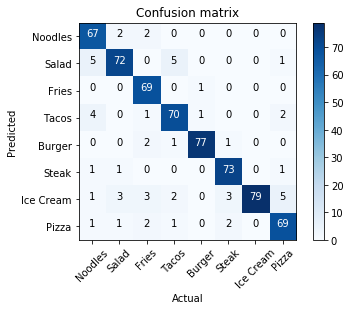

In [21]:
cmf_resnet50 = confusion_matrix(predictions_resnet50, test_labels)
plt.figure()
plot_confusion_matrix(cmf_resnet50, 
                      classes=['Noodles', 'Salad', 'Fries', 'Tacos', 'Burger', 'Steak', 'Ice Cream', 'Pizza'])
plt.show()

Many false positive classification were made on the 'Salad' label as being either a 'Taco' or 'Noodles'. This may be because there are many green vegetables on these dishes and the model might mistaken them as being a 'salad'. 'Tacos' are sometimes misclassified as 'Noodles' which maybe due to the color. Ice cream has lots of false positives, this may be because 'ice cream' comes in many shapes and colors.  

## Visualizing false predictions

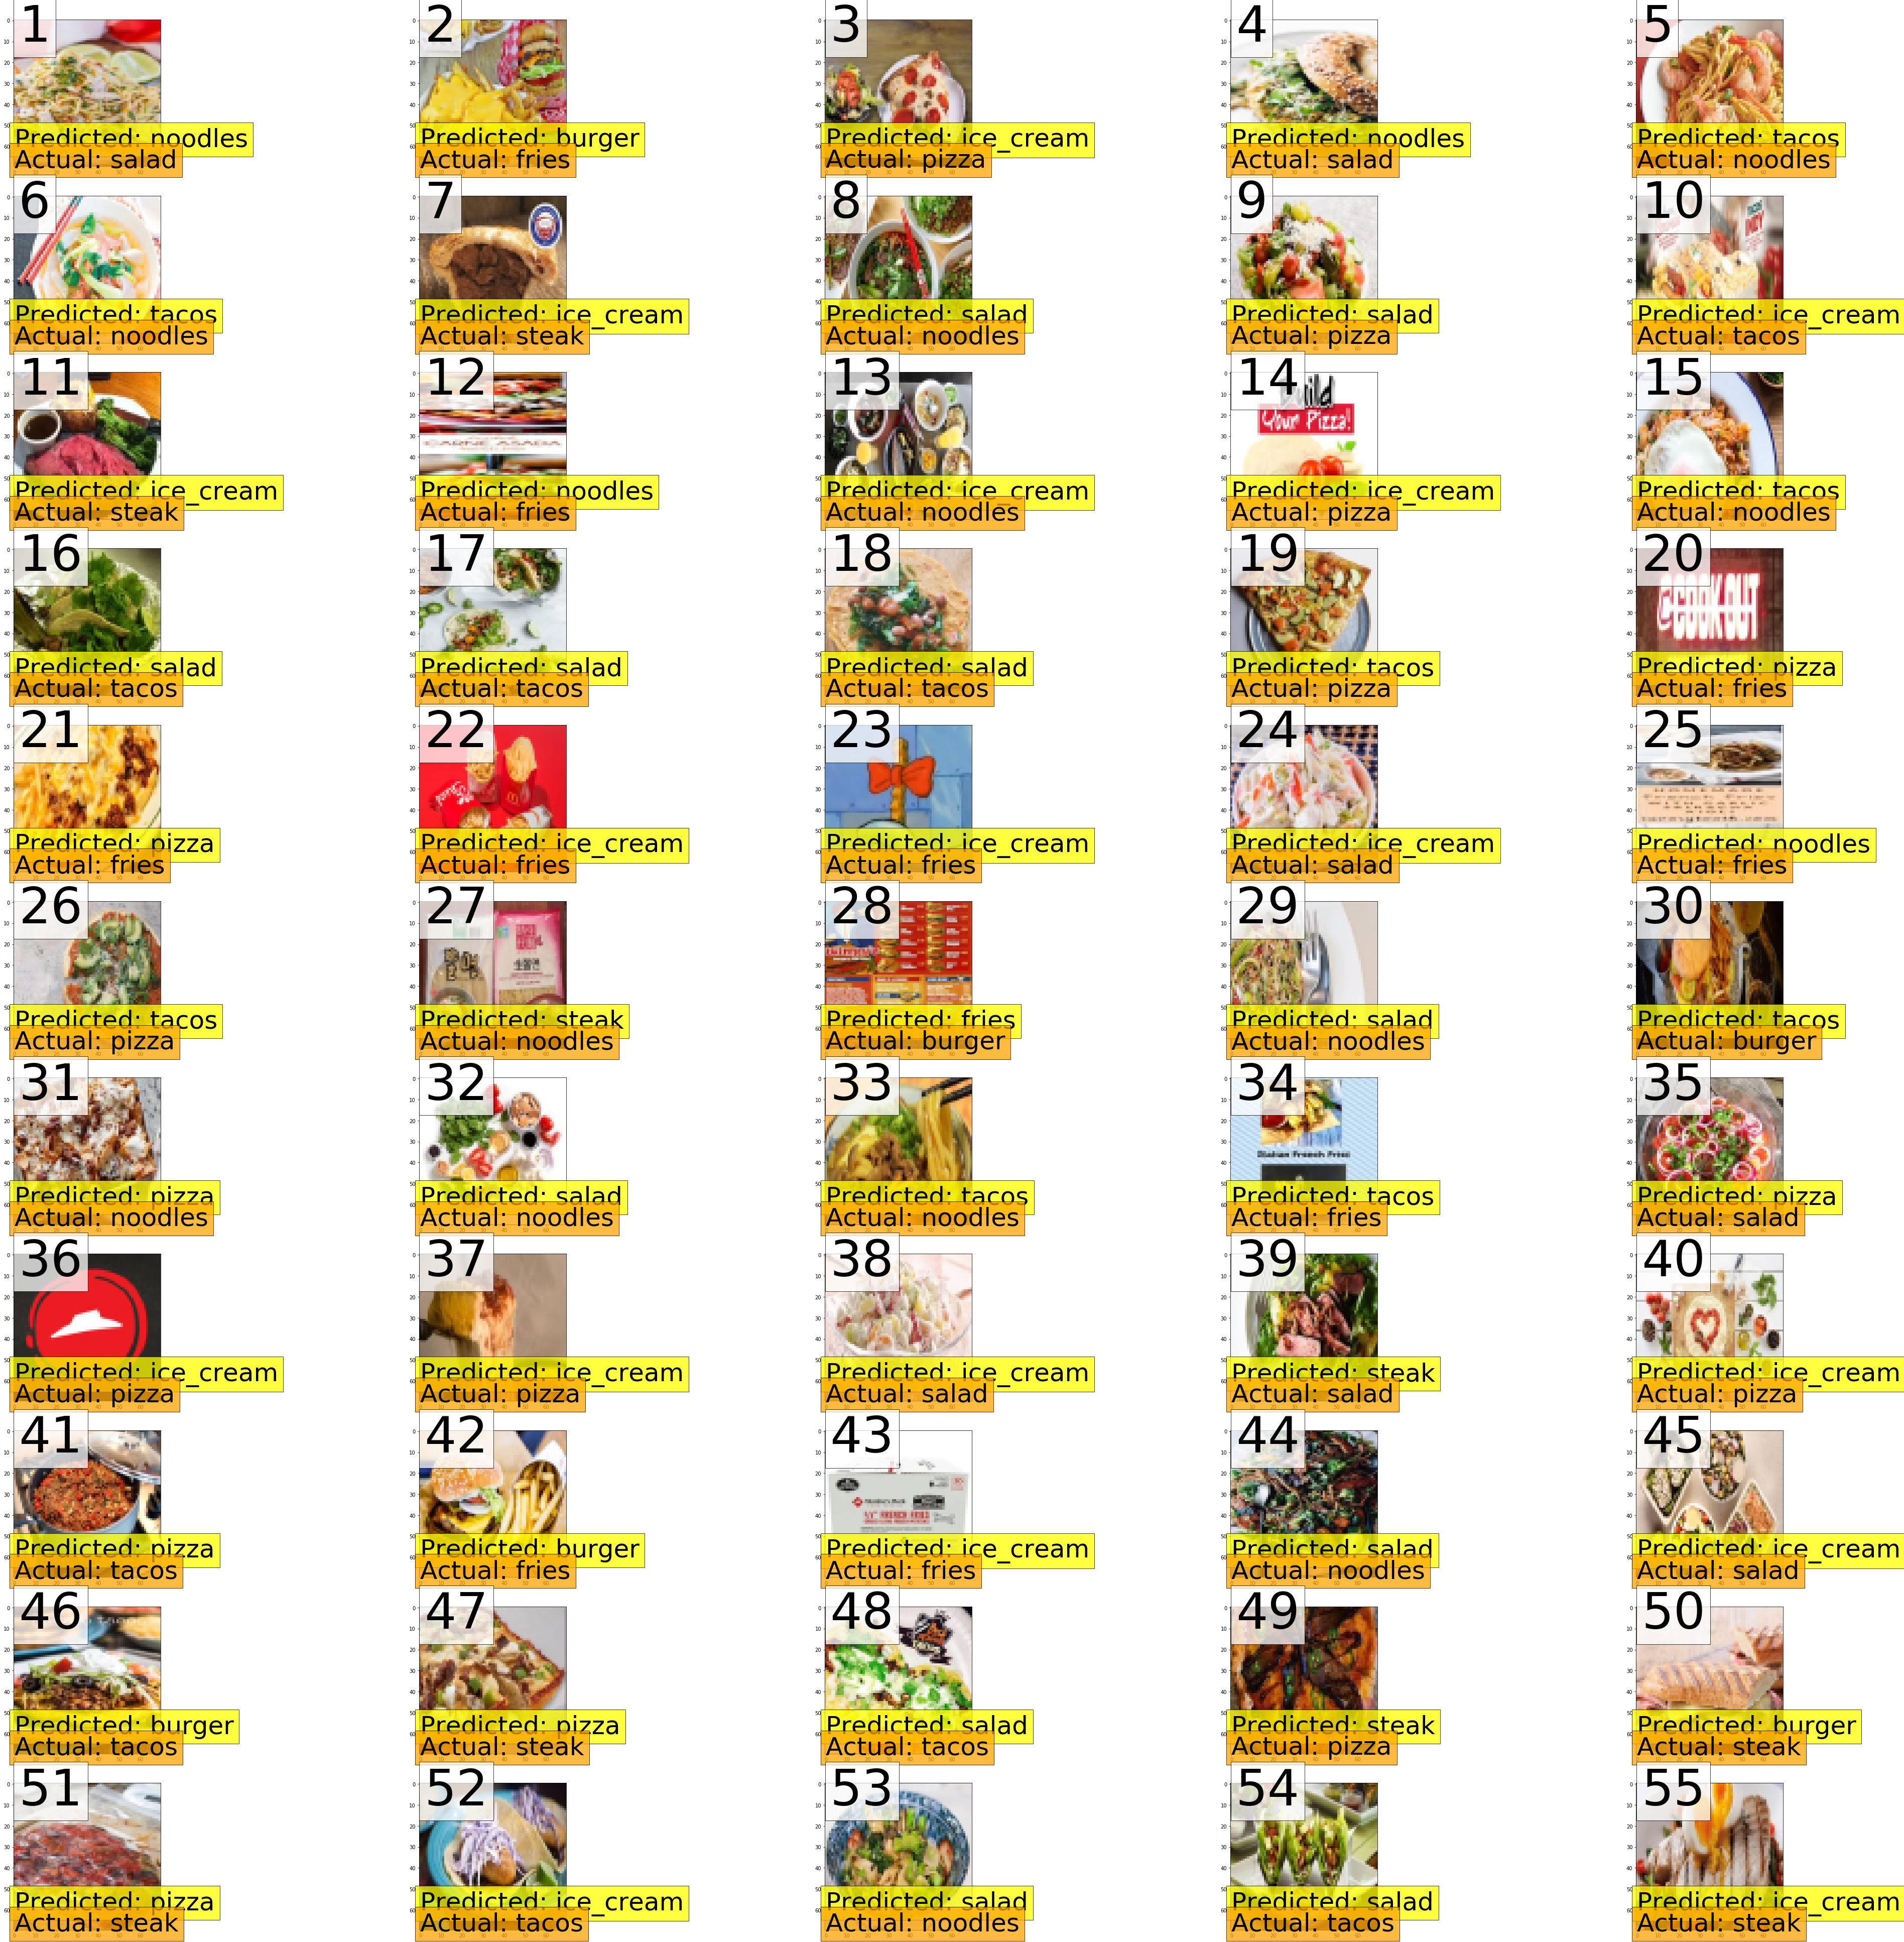

In [38]:
fig=plt.figure(figsize=(70, 70))
columns = 5
rows = 11
for k,path in enumerate(false_prediction_resnet50_path):
    img = cv2.imread(path)
    resized = cv2.resize(img, (70,70), interpolation = cv2.INTER_AREA)
    cv_rgb = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(rows, columns, k+1)
    ax.text(2, 10, str(k+1), size=100, 
            bbox={'facecolor':'white', 'alpha':0.75, 'pad':10})
    ax.text(0, 60, 'Predicted: '+get_food(false_prediction_resnet50_pred[k]), size=50, 
            bbox={'facecolor':'yellow', 'alpha':0.75, 'pad':10})
    ax.text(0, 70, 'Actual: '+get_food(false_prediction_resnet50_actual[k]), size=50, 
            bbox={'facecolor':'orange', 'alpha':0.75, 'pad':10})
    plt.imshow(cv_rgb)
plt.show()

### Performance of the model on few of the 'Yelp' dataset Images

In [26]:
def get_prediction(path):    
    img = cv2.imread(path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, channels = np.shape(cv_rgb)
    plt.imshow(cv_rgb)
    pred_ = np.argmax(model_resnet50.predict(paths_to_tensor([path]).astype('float32')/255))
    in_df = {'Label':['Noodles', 'Salad', 'Fries', 'Tacos', 'Burger', 'Steak', 'Ice Cream', 'Pizza']
           ,'Probability':model_resnet50.predict(paths_to_tensor([path]).astype('float32')/255)[0]}
    plt.text(width+5,height, DataFrame(in_df), size=15)
    plt.text(width*0.5, height*0.9, "Prediction: "+get_food(pred_), 
             bbox={'facecolor':'white', 'alpha':0.75, 'pad':10}, size=15)
    plt.show()

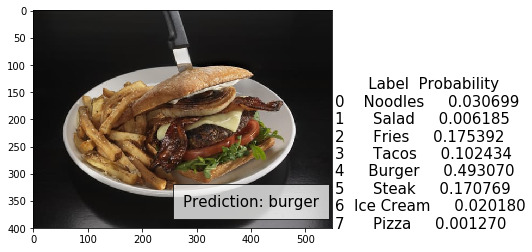

In [27]:
get_prediction('photos/ijMv14pGuEj1htYb11sTLg.jpg') # Caption: NW pub burger

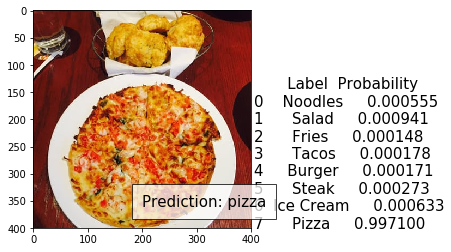

In [28]:
get_prediction('photos/C-12IVcC5mv1anP99tIZmA.jpg') # Caption: Lobster pizza

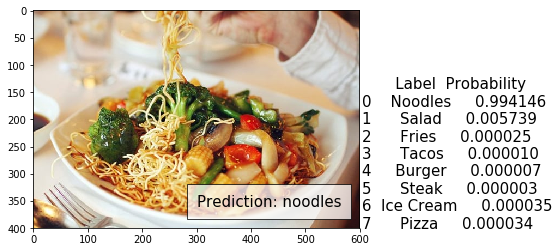

In [29]:
get_prediction('photos/YPqePy_MXK9LhrZoTrvg8A.jpg') # Caption: vegetable chow mein

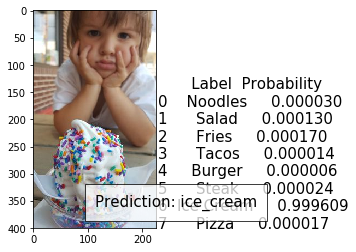

In [30]:
get_prediction('photos/jdF08yh_7ZXxWSPeLqvXKg.jpg') # Caption: Small vanilla ice cream with rainbow sprinkles. 
                                                    #Upset toddler in the background because I told him to 
                                                    #wait a sec while I snapped a picture!

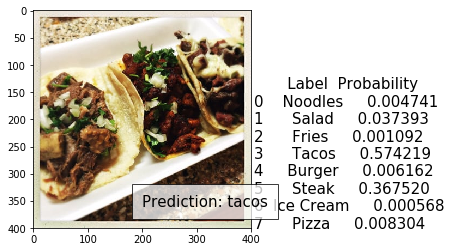

In [31]:
get_prediction('photos/6VfOKG8yTkCQgzrmYQbW8A.jpg') # Caption: Lengua, pastor & chiwas tacos.

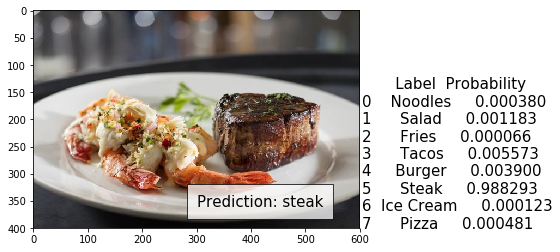

In [32]:
get_prediction('photos/mn7vaMP58d4RzF2arouliA.jpg') # Caption: Our premium hand-cut steaks and exceptional seafood 
                                                    #when the two pair so brilliantly together! Try our filet mignon
                                                    #with stuffed shrimp!

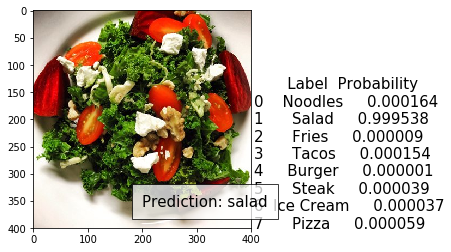

In [33]:
get_prediction('photos/49P9x4p_v0pdeukfqTVQ3A.jpg') # Caption: Kale salad

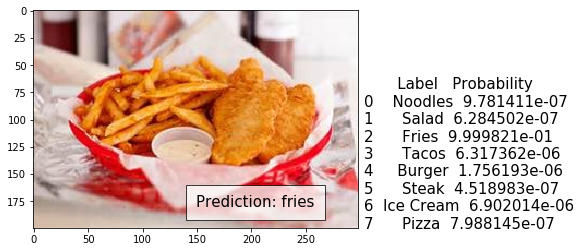

In [52]:
get_prediction('photos/YR5ReqI_Kahli7q9HdrCig.jpg') # Caption: Delicious Tenders & fries $6.00

## Export ResNet50 architecture

In [53]:
model_resnet50_yaml = model_resnet50.to_yaml()
with open("final_model/model_food.yaml", "w") as yaml_file:
    yaml_file.write(model_resnet50_yaml)